In [177]:
import pandas as pd
from matplotlib import pyplot as plt, ticker

In [178]:
def million_formatter(x, pos):
    return "%.0f M" % (x/1E6)

### Importando os dados de exportação de vinhos

In [179]:
expVinho = pd.read_csv("data/ExpVinho.csv", sep=";", thousands=".", decimal=",")
expVinho.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,11,46,0,0,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,26,95,4,21,0,0,0,0,117,698
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,3660,25467,6261,32605,2698,6741,7630,45367,4806,31853
3,4,Angola,0,0,0,0,0,0,0,0,...,345,1065,0,0,0,0,4068,4761,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Criando o Dataframe de valores em Litros

In [180]:
expVinhoLitros = pd.concat([expVinho["País"], expVinho[expVinho.iloc[:,0::2].columns]], axis=1)
expVinhoLitros.set_index("País", inplace=True)
expVinhoLitros = expVinhoLitros.iloc[:,-15:] # ultimos 15 anos
expVinhoLitros['Total'] = expVinhoLitros.sum(numeric_only=True, axis=1)
expVinhoLitros.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
País,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,11
África do Sul,0,0,0,0,0,0,0,0,0,0,26,4,0,0,117,147
"Alemanha, República Democrática",225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698,7630,4806,648115
Angola,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0,4068,0,143147
Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Criando o Dataframe de valores em USS

In [181]:
expVinhoValor = expVinho.iloc[:,1::2]
expVinhoValor.columns = expVinhoValor.columns.str[0:4] # remove o .1 do nome da coluna
expVinhoValor.set_index("País", inplace=True)
expVinhoValor = expVinhoValor.iloc[:,-15:] # ultimos 15 anos
expVinhoValor['Total'] = expVinhoValor.sum(numeric_only=True, axis=1)
expVinhoValor.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
País,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,46,0,0,46
África do Sul,0,0,0,0,0,0,0,0,0,0,95,21,0,0,698,814
"Alemanha, República Democrática",393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367,31853,2148277
Angola,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,4761,0,505106
Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Top 10 exportações do Brasil em litros

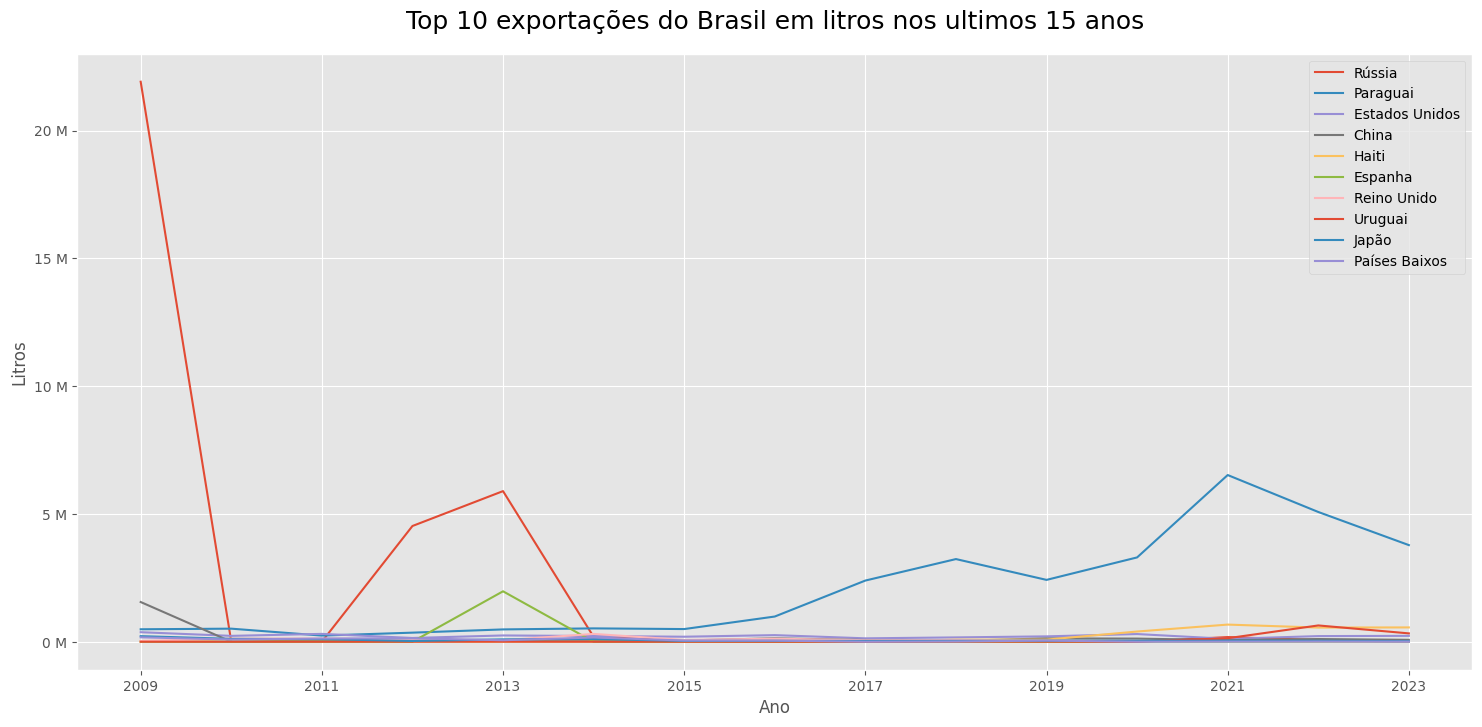

In [182]:
df_plot_l = expVinhoLitros.sort_values(by="Total", ascending=False).head(10).iloc[: , :-1].T.iloc[0:] # remove a coluna total

plt.style.use("ggplot")

axis = df_plot_l.plot(figsize=(18,8))
axis.yaxis.set_major_formatter(million_formatter)
axis.set_xlabel('Ano')
axis.set_ylabel('Litros')
title_obj = plt.title("Top 10 exportações do Brasil em litros nos ultimos 15 anos", fontsize=18, pad=18)
plt.setp(title_obj, color='black') 
plt.legend(labelcolor='black')

plt.show()

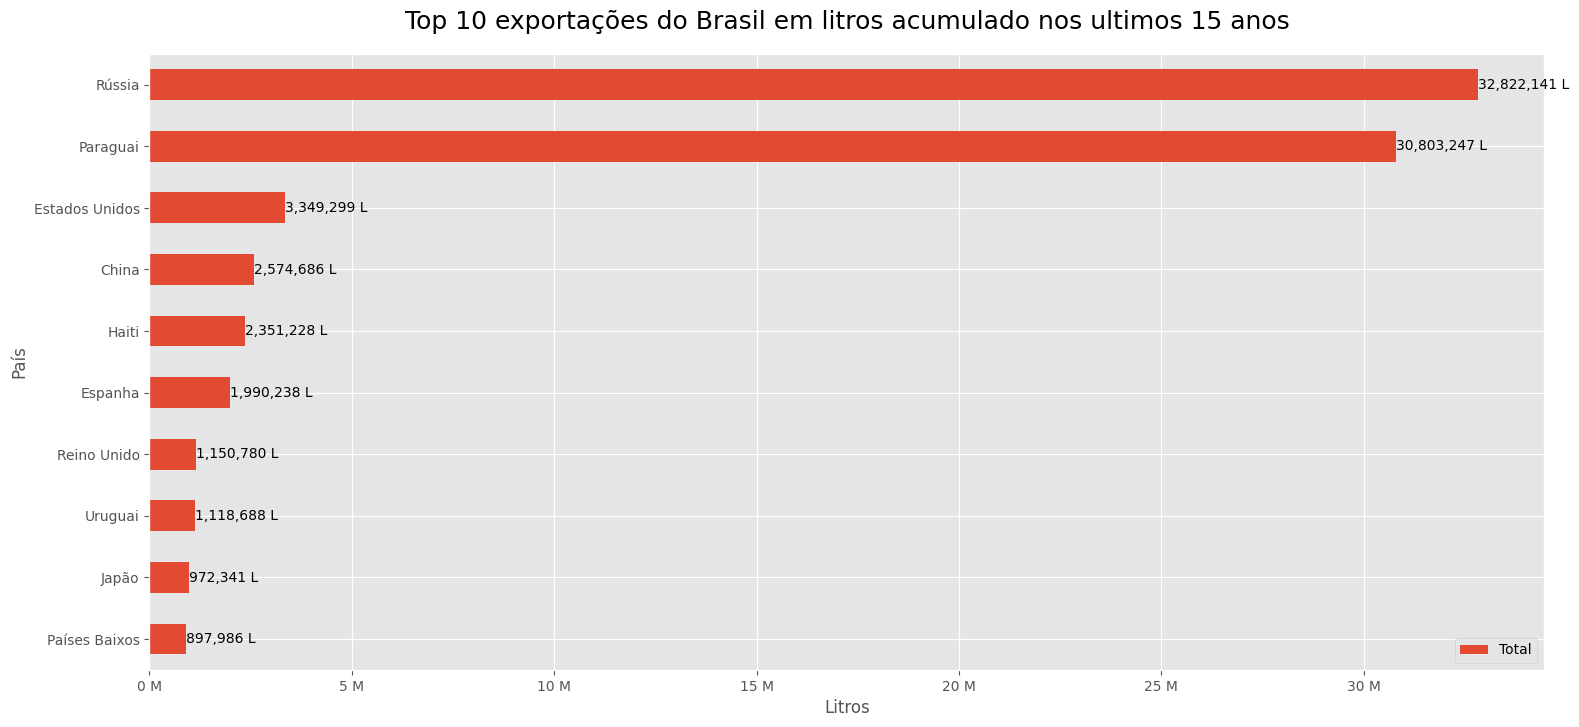

In [183]:
df_plot_lt = expVinhoLitros.sort_values(by="Total", ascending=False).head(10)
new_df_lt = pd.concat([df_plot_lt.iloc[:,0:0],df_plot_lt.iloc[:,-1:]],axis = 1).iloc[::-1]

axis = new_df_lt.plot.barh(figsize=(18,8))
axis.xaxis.set_major_formatter(million_formatter)
axis.set_ylabel('País') 
axis.set_xlabel('Litros') 
title_obj = plt.title("Top 10 exportações do Brasil em litros acumulado nos ultimos 15 anos", fontsize=18, pad=18)
plt.setp(title_obj, color='black') 
plt.legend(labelcolor='black')
# texto para cada barra
axis.bar_label(axis.containers[0], fmt='{:,.0f} L', color='black')


plt.show()

### Top 10 exportações do Brasil em USS

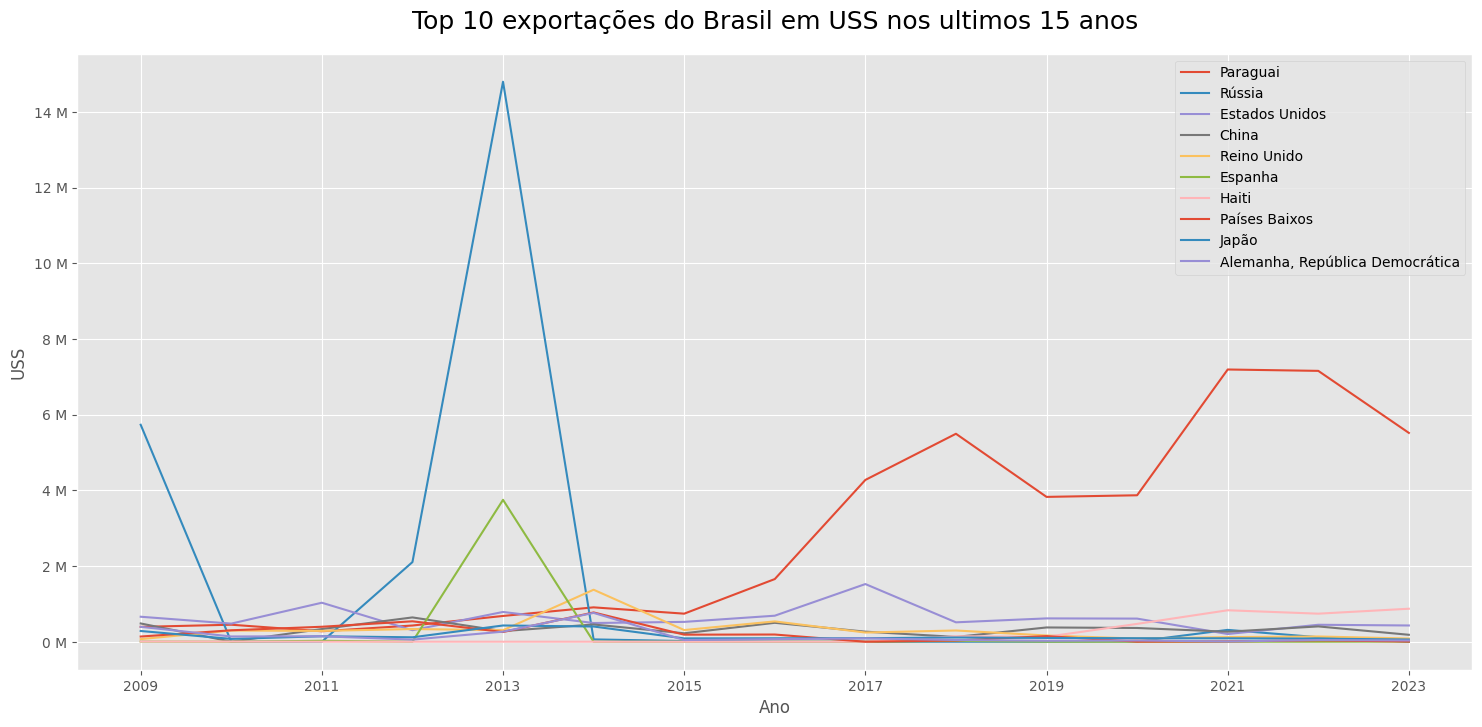

In [184]:
df_plot_v = expVinhoValor.sort_values(by="Total", ascending=False).head(10).iloc[: , :-1].T.iloc[0:] # remove a coluna total

axis = df_plot_v.plot(figsize=(18,8))
axis.yaxis.set_major_formatter(million_formatter)
axis.set_xlabel('Ano', fontsize=12)
axis.set_ylabel('USS', fontsize=12)
title_obj = plt.title("Top 10 exportações do Brasil em USS nos ultimos 15 anos", fontsize=18, pad=18)
plt.setp(title_obj, color='black')
plt.legend(labelcolor='black')

plt.show()

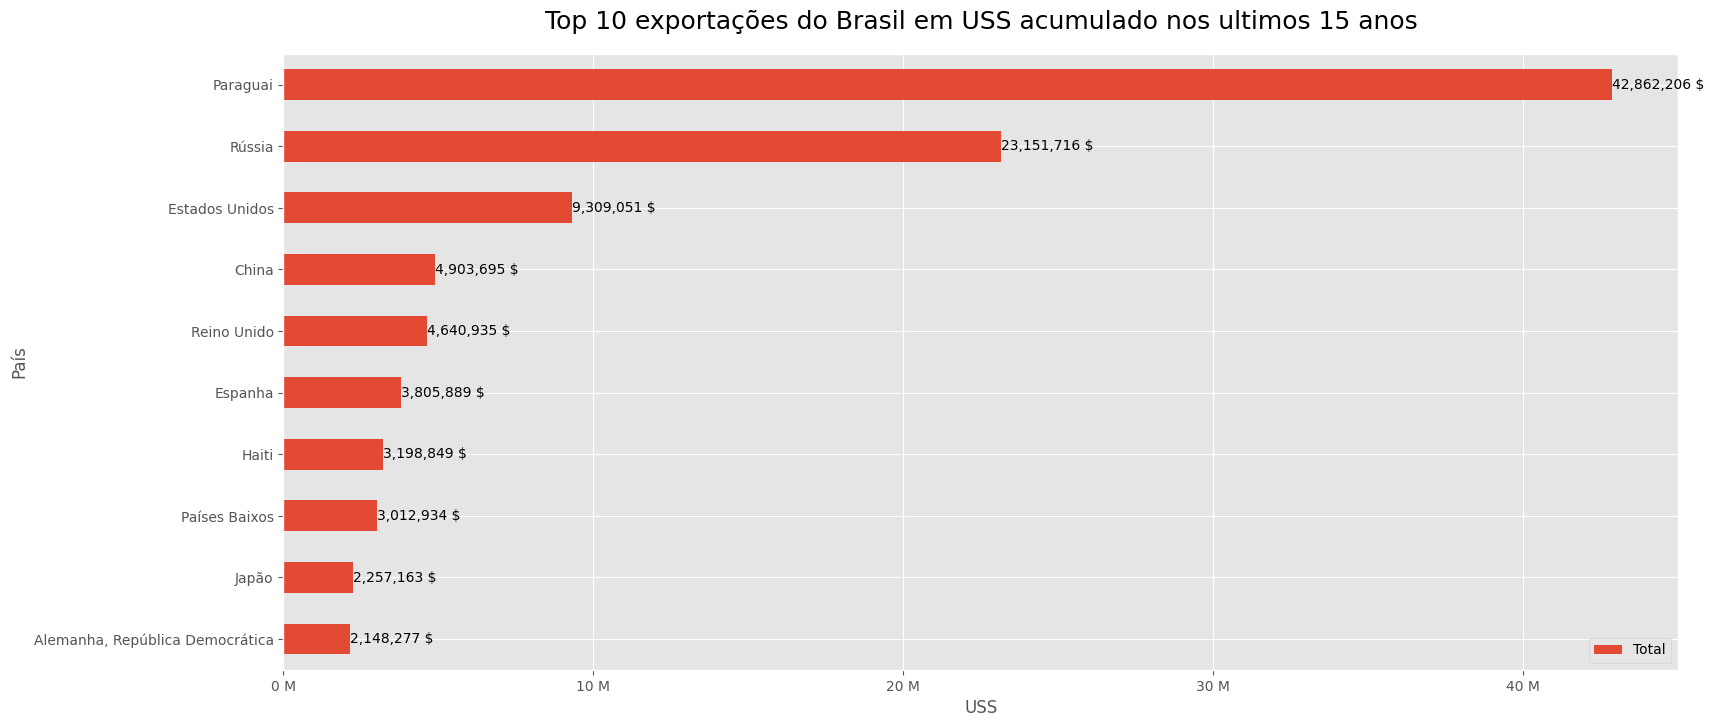

In [185]:
df_plot_vt = expVinhoValor.sort_values(by="Total", ascending=False).head(10)
new_df_vt = pd.concat([df_plot_vt.iloc[:,0:0],df_plot_vt.iloc[:,-1:]],axis = 1).iloc[::-1]

axis = new_df_vt.plot.barh(figsize=(18,8))
axis.xaxis.set_major_formatter(million_formatter)
axis.set_ylabel('País') 
axis.set_xlabel('USS') 
title_obj = plt.title("Top 10 exportações do Brasil em USS acumulado nos ultimos 15 anos", fontsize=18, pad=18)
plt.setp(title_obj, color='black') 
plt.legend(labelcolor='black')
# texto para cada barra
axis.bar_label(axis.containers[0], fmt='{:,.0f} $', color='black')

plt.show()

### Preço por Litro

In [186]:
expPrecoLitro = (expVinhoValor / expVinhoLitros).fillna(0)
expPrecoLitro.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
País,,,,,,,,,,,,,,,,
Afeganistão,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.181818,0.000000,0.000000,4.181818
África do Sul,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.653846,5.250000,0.000000,0.000000,5.965812,5.537415
"Alemanha, República Democrática",1.748141,5.003283,3.996396,6.880205,4.310896,3.570003,4.192884,4.860762,5.670266,4.204373,6.958197,5.207635,2.498517,5.945872,6.627757,3.314654
Angola,1.537528,5.658760,4.968032,3.127780,5.912270,1.898210,8.956499,4.809077,6.064897,1.486373,3.086957,0.000000,0.000000,1.170354,0.000000,3.528583
Anguilla,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


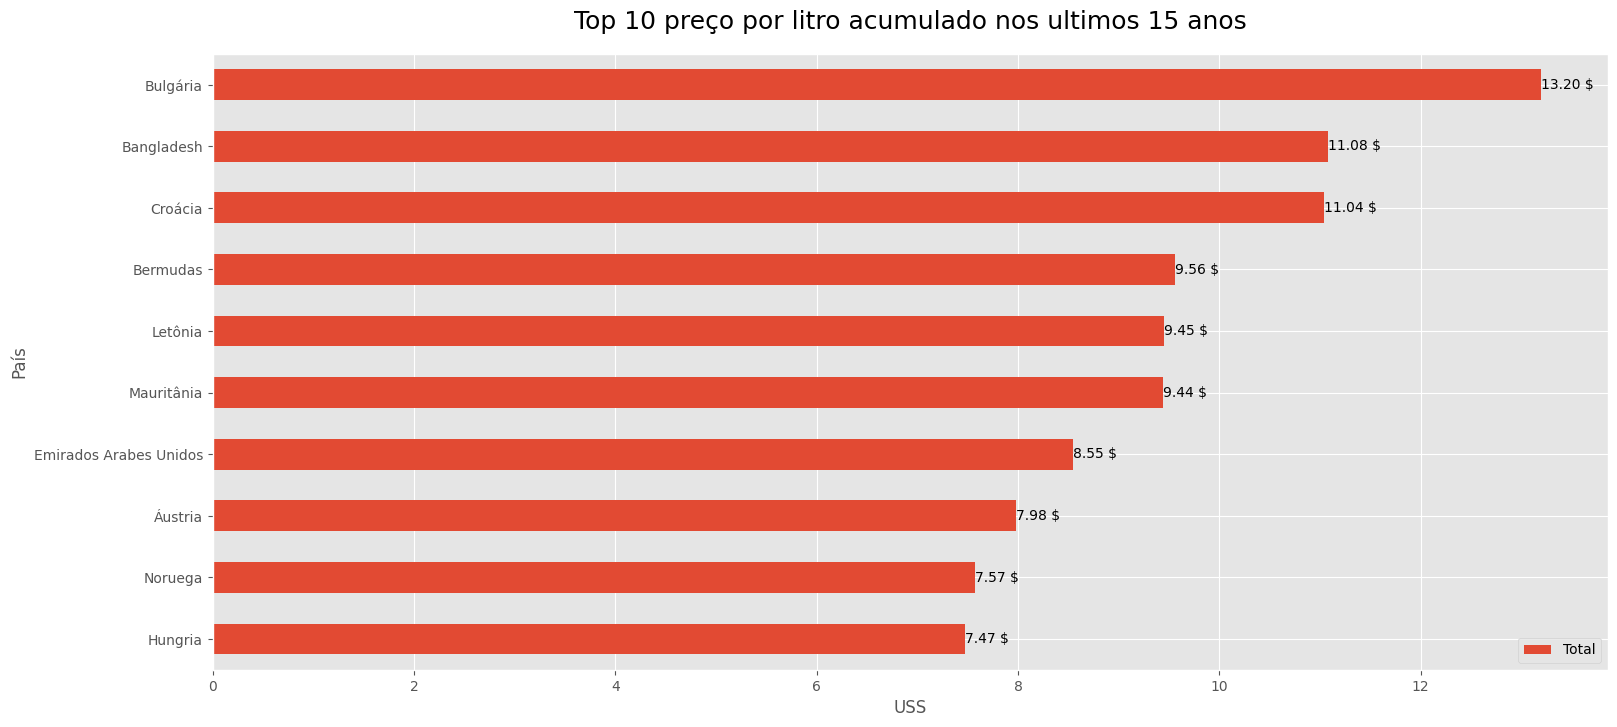

In [187]:
df_plot_pl = expPrecoLitro.sort_values(by="Total", ascending=False).head(10)
new_df_pl = pd.concat([df_plot_pl.iloc[:,0:0],df_plot_pl.iloc[:,-1:]],axis = 1).iloc[::-1]

axis = new_df_pl.plot.barh(figsize=(18,8))
#axis.xaxis.set_major_formatter(million_formatter)
axis.set_ylabel('País') 
axis.set_xlabel('USS') 
title_obj = plt.title("Top 10 preço por litro acumulado nos ultimos 15 anos", fontsize=18, pad=18)
plt.setp(title_obj, color='black') 
plt.legend(labelcolor='black')
# texto para cada barra
axis.bar_label(axis.containers[0], fmt='{:,.2f} $', color='black')

plt.show()